# UTS Model Deployment No 1
Nama: Felicia Audrey Tanujaya  
NIM: 2702217610  
Kelas: LE09 Data Science

## Impor library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
import pickle
import gzip
seed = 42

In [ ]:
df = pd.read_csv('Dataset_B_hotel.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exploratory Data Analysis & Preprocessing

In [61]:
#Deskripsi Statistik
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 32607 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32607 non-null  int64  
 1   no_of_children                        32607 non-null  int64  
 2   no_of_weekend_nights                  32607 non-null  int64  
 3   no_of_week_nights                     32607 non-null  int64  
 4   type_of_meal_plan                     32607 non-null  object 
 5   required_car_parking_space            32607 non-null  float64
 6   room_type_reserved                    32607 non-null  object 
 7   lead_time                             32607 non-null  int64  
 8   arrival_year                          32607 non-null  int64  
 9   arrival_month                         32607 non-null  int64  
 10  arrival_date                          32607 non-null  int64  
 11  market_segment_type 

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000,32607.000000
mean,1.844880,0.105008,0.811912,2.206029,0.030607,85.574509,2017.820560,7.426718,15.581716,0.025424,0.023492,0.148680,103.426315,0.616555,0.670899
std,0.517005,0.402655,0.872569,1.417267,0.172253,86.165218,0.383726,3.064292,8.730190,0.157411,0.375686,1.699241,35.166643,0.785042,0.469894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.340000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Dataset terdiri dari 36.275 entri dan 18 kolom yang mencakup informasi seputar reservasi hotel, karakteristik tamu, serta atribut waktu dan harga. Secara umum, mayoritas kolom bertipe numerik, dengan beberapa kolom bertipe kategori seperti type_of_meal_plan, room_type_reserved, dan booking_status.


In [ ]:
#Cek missing values
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,907
required_car_parking_space,1270
room_type_reserved,0
lead_time,0
arrival_year,0


Terdapat missing values pada tiga kolom: type_of_meal_plan (907), required_car_parking_space (1270), dan avg_price_per_room (1632), yang masing-masing setara dengan kurang dari 5% dari total data (36275). Karena proporsinya kecil dan ketiga fitur ini cukup penting bagi model, baris yang mengandung nilai null dihapus agar data tetap bersih tanpa mengorbankan jumlah data secara signifikan.

In [ ]:
#Drop missing values
df.dropna(inplace=True)

In [ ]:
#Cek data duplikat
print(df.duplicated().sum())


0


Setelah pengecekan, tidak ditemukan adanya data duplikat dalam dataset ini.

In [ ]:
#Membuat list terpisah untuk fitur numerical dan categorical
categorical = []
numerical = []

for i in df.columns:
    if df[i].dtype == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

print(f'Categorical: {categorical}')
print(f'Numerical: {numerical}')

Categorical: ['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
Numerical: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [ ]:
#Drop kolom identifier
df.drop('Booking_ID', axis=1, inplace=True)
categorical.remove('Booking_ID')

Kolom Booking_ID dihapus karena bersifat unik (merupakan unique identifier) untuk setiap entri dan tidak memiliki kontribusi terhadap prediksi target.

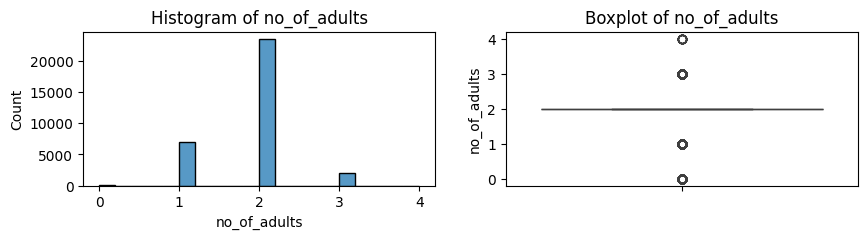

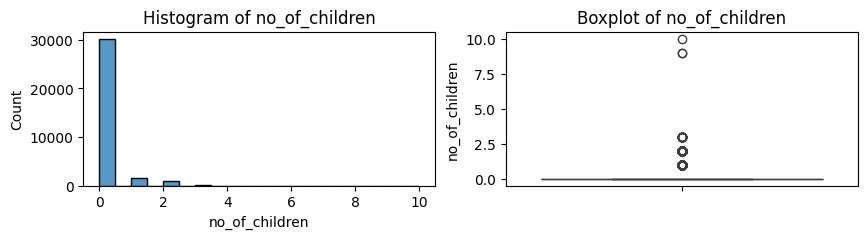

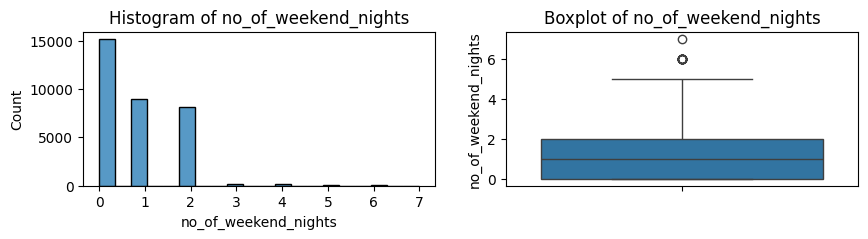

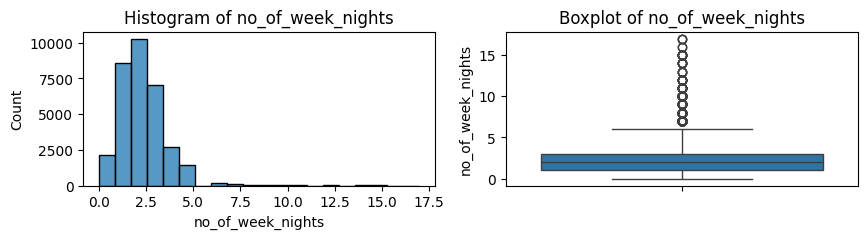

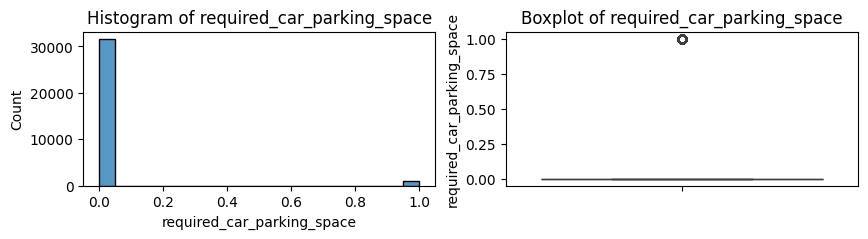

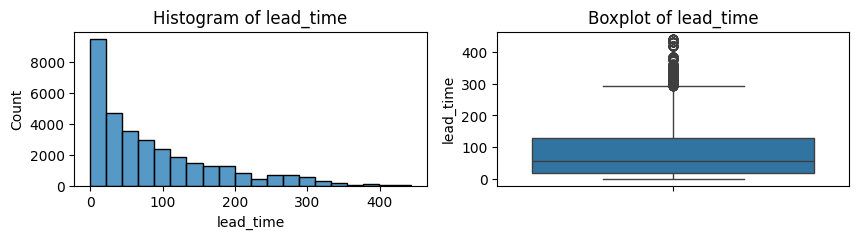

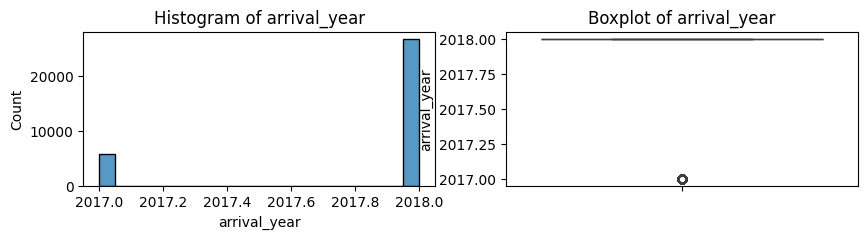

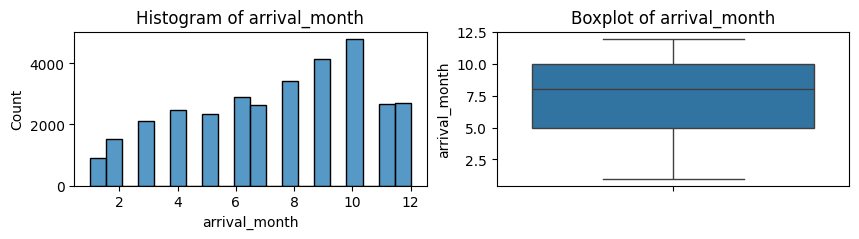

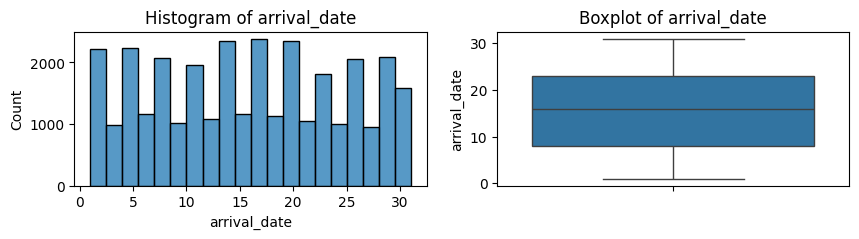

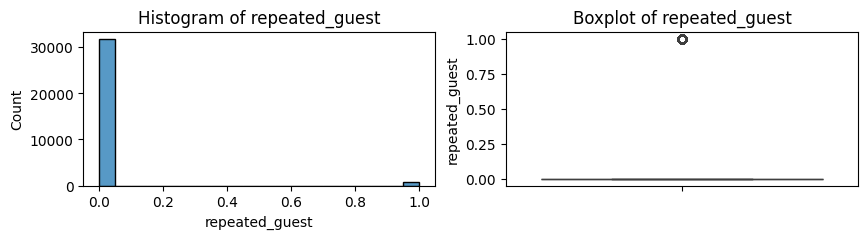

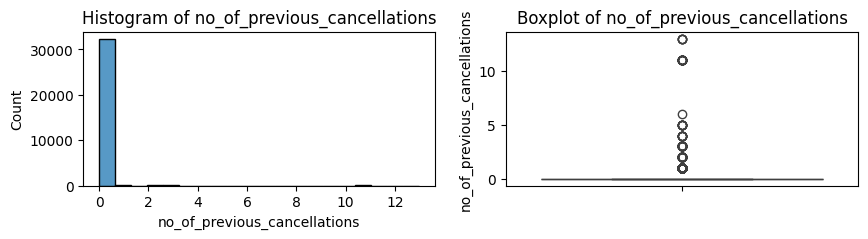

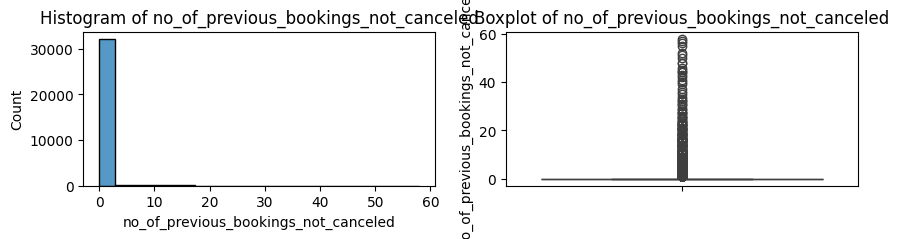

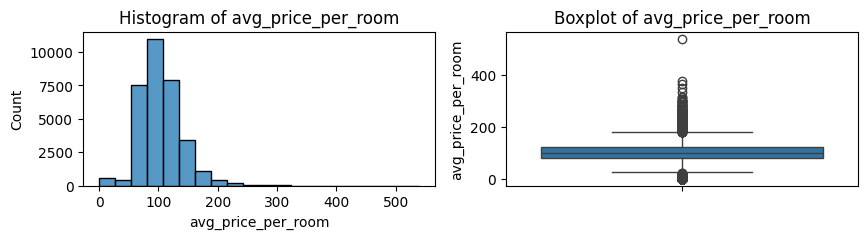

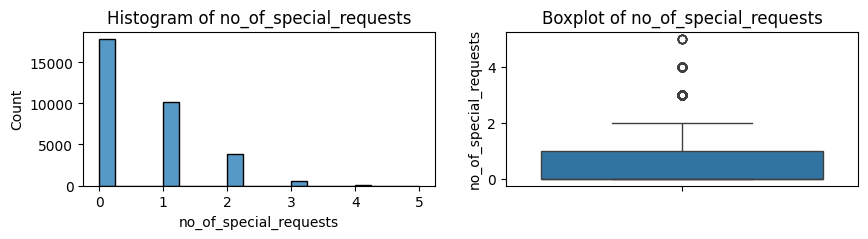

In [ ]:
def check_dist(df, column):
    for i in column:
        plt.figure(figsize=(10,2))
        plt.subplot(1,2,1)
        sns.histplot(df[i], bins=20)
        plt.title(f'Histogram of {i}')

        plt.subplot(1,2,2)
        sns.boxplot(y=df[i])
        plt.title(f'Boxplot of {i}')
        plt.show()

check_dist(df[numerical], numerical)

Sebagian besar fitur numerik menunjukkan distribusi yang tidak normal dan cenderung skewed, seperti lead_time, avg_price_per_room, dan no_of_week_nights. Terdapat banyak outlier terutama pada fitur seperti lead_time, avg_price_per_room, no_of_previous_bookings_not_canceled, dan no_of_previous_cancellations.

In [ ]:
for col in categorical:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'type_of_meal_plan':
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']

Unique values in 'room_type_reserved':
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']

Unique values in 'market_segment_type':
['Offline' 'Online' 'Corporate' 'Complementary' 'Aviation']

Unique values in 'booking_status':
['Not_Canceled' 'Canceled']


 Fitur fitur seperti 'type_of_meal_plan', 'room_type_reserved', dan 'market_segment_type' termasuk dalam tipe nominal, karena masing-masing berisi kategori yang tidak memiliki urutan atau ranking. Sedangkan 'booking_status' adalah variabel binary dengan 2 tipe yaitu Canceled dan Not_Canceled.

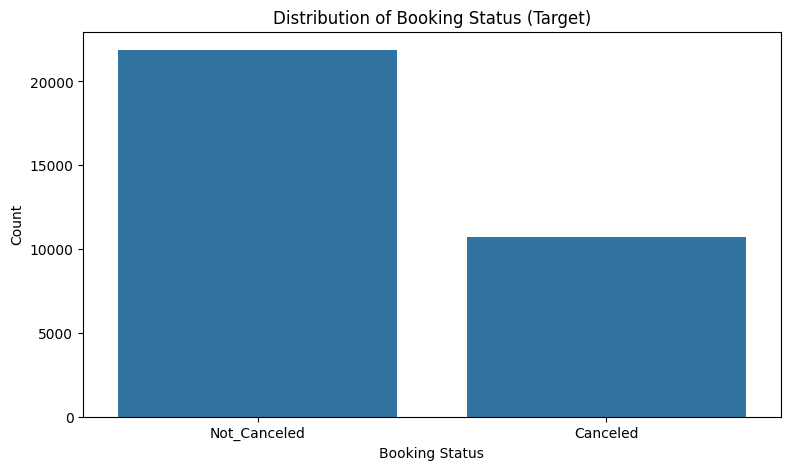

In [ ]:
#Check the distribution of target variable in the dataset
#Visualize the target column y
plt.figure(figsize=(9, 5))
sns.countplot(x='booking_status', data=df, order=df['booking_status'].value_counts().index)
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.title('Distribution of Booking Status (Target)')
plt.show()

Terdapat class imbalance pada variabel 'booking_status', dengan lebih banyak data pada kategori 'Not_Canceled' dibandingkan 'Canceled'. Imbalance ini perlu diatasi dalam pemodelan agar hasil prediksi tetap akurat dan tidak bias, sehingga nantinya akan dihandle dengan melakukan resampling

In [ ]:
labelenc = LabelEncoder()
df['booking_status'] = labelenc.fit_transform(df['booking_status'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


Variabel target 'booking_status' diencode menjadi numerik menggunakan LabelEncoder yang mengubah kategori 'Not_Canceled' dan 'Canceled' menjadi angka (0/1).

In [ ]:
#Splitting
x = df.drop(columns=['booking_status'])
y = df['booking_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

Data kemudian displit menjadi training dan testing set menggunakan train_test_split(), dengan rasio 80:20 di mana 20% data digunakan untuk testing dan sisanya untuk training.

In [ ]:
#Menyimpan fitur asli untuk keperluan prediksi di streamlit
x_test_raw = x_test.copy()

In [ ]:
#Scaling
robust = RobustScaler()
x_train[numerical] = robust.fit_transform(x_train[numerical])
x_test[numerical] = robust.transform(x_test[numerical])
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
6090,-1.0,0.0,0.0,-1.0,Meal Plan 1,0.0,Room_Type 1,-0.409091,0.0,0.8,-0.733333,Online,0.0,0.0,0.0,-0.086902,0.0
30808,0.0,0.0,0.5,0.0,Meal Plan 1,0.0,Room_Type 1,0.381818,0.0,-0.8,0.066667,Offline,0.0,0.0,0.0,-0.471033,1.0
24559,1.0,0.0,0.5,0.5,Meal Plan 1,0.0,Room_Type 4,1.236364,0.0,0.0,0.666667,Online,0.0,0.0,0.0,0.642317,0.0
32240,-1.0,0.0,0.5,-0.5,Meal Plan 2,0.0,Room_Type 1,0.409091,-1.0,-0.2,0.133333,Offline,0.0,0.0,0.0,-0.678841,0.0
4769,0.0,0.0,-0.5,0.0,Meal Plan 2,0.0,Room_Type 1,0.145455,-1.0,0.2,0.133333,Offline,0.0,0.0,0.0,0.240554,0.0


Saya menggunakan Robust Scaler untuk scaling beberapa fitur numerik. Dibanding Standard Scaler yang berbasis mean dan standar deviasi, Robust Scaler menggunakan median dan IQR sehingga lebih tahan terhadap outlier. Proses scaling dilakukan setelah data displit, di mana dilakukan fit transform hanya pada data training lalu transform digunakan pada validation dan test set.

In [ ]:
#OneHotEncoding on nominal data
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical.remove('booking_status')
encoded_train = ohe.fit_transform(x_train[categorical])
encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out(categorical))
x_train = x_train.reset_index(drop=True).drop(categorical, axis=1)
x_train = pd.concat([x_train, encoded_train_df], axis=1)

encoded_test = ohe.transform(x_test[categorical])
encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(categorical))
x_test = x_test.reset_index(drop=True).drop(categorical, axis=1)
x_test = pd.concat([x_test, encoded_test_df], axis=1)


Sebelum modelling, fitur categorical harus diubah menjadi representasi numerik. Saya menggunakan OneHotEncoder untuk mengonversi kategori menjadi kolom biner terpisah. Proses fit_transform() dilakukan pada data training, dan transform() pada data test dan validation untuk menghindari data leakage.

In [ ]:
#Random oversampling -> to handle class imbalance
ros = RandomOverSampler(random_state=seed)
x_train, y_train = ros.fit_resample(x_train, y_train)
print("result", Counter(y_train))

result Counter({1: 17461, 0: 17461})


Randomoversampler digunakan untuk menangani class imbalance dengan menambah jumlah sample pada kelas minoritas (canceled). Proses ini menghasilkan jumlah sampel yang seimbang antara 'Not_Canceled' dan 'Canceled' pada data training, seperti yang terlihat pada hasil Counter dengan jumlah yang sama (17,461) untuk kedua kelas.

## Modelling

In [ ]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(f1_score(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      2107
           1       0.93      0.90      0.91      4415

    accuracy                           0.89      6522
   macro avg       0.87      0.88      0.87      6522
weighted avg       0.89      0.89      0.89      6522

[[1800  307]
 [ 441 3974]]
0.9139834406623735
0.885311254216498


1. Accuracy: Model XGBoost mencapai accuracy 0.89, yang menunjukkan bahwa 89% dari prediksi model benar. Ini mengindikasikan performa yang cukup baik.

2. Precision: Precision untuk kelas 'Not Canceled' (1) mencapai 0.93, menunjukkan bahwa model sangat akurat dalam memprediksi kelas ini. Namun, untuk 'Canceled' (0), precision lebih rendah di 0.80 yang berarti masih ada sejumlah false positives untuk kelas ini.

3. Recall: Recall untuk 'Not Canceled' adalah 0.90, menandakan model dapat mendeteksi sebagian besar instance dari kelas ini. Namun, recall untuk 'Canceled' lebih rendah di 0.85, yang menunjukkan model masih melewatkan beberapa prediksi untuk kelas ini.

4. F1-Score: F1-Score untuk 'Not Canceled' (1) lebih tinggi di 0.91, menunjukkan keseimbangan yang baik antara precision dan recall. Sedangkan untuk 'Canceled' (0), F1-Score lebih rendah di 0.83, mengindikasikan ada ketidakseimbangan dalam kemampuan model untuk menangani kedua kelas.

5. Confusion Matrix: Berdasarkan confusion matrix, terdapat 1800 True Negatives (TN) dan 3974 True Positives (TP), menunjukkan bahwa model lebih akurat memprediksi 'Not_Canceled' dan 'Canceled'. Namun, ada 307 False Positives (FP) dan 441 False Negatives (FN), yang menunjukkan bahwa model masih kesulitan dalam membedakan kedua kelas, terutama dalam memprediksi 'Canceled'.

In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state=seed, max_depth=30)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(f1_score(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2107
           1       0.92      0.94      0.93      4415

    accuracy                           0.90      6522
   macro avg       0.89      0.88      0.89      6522
weighted avg       0.90      0.90      0.90      6522

[[1739  368]
 [ 277 4138]]
0.9276986884878377
0.9011039558417663


1. Accuracy: Model Random Forest mencapai accuracy 0.90, yang berarti 90% prediksi model benar, menunjukkan performa yang sangat baik pada data uji.

2. Precision: Precision untuk 'Not Canceled' (1) adalah 0.92, menandakan model sangat akurat dalam memprediksi kelas ini. Untuk 'Canceled' (0), precision lebih rendah di 0.86, yang menunjukkan masih ada beberapa false positives untuk kelas ini.

3. Recall: Recall untuk 'Not Canceled' adalah 0.94, menunjukkan model berhasil menangkap sebagian besar instance kelas ini. Sedangkan untuk 'Canceled', recall lebih rendah di 0.83, yang mengindikasikan beberapa instance dari kelas ini terlewat.

4. F1-Score: F1-Score untuk 'Not Canceled' (1) adalah 0.93, menunjukkan balance yang baik antara precision dan recall. Sementara 'Canceled' (0) memiliki F1-Score 0.84.

5. Confusion Matrix: Confusion matrix menunjukkan 1739 True Negatives (TN) dan 4138 True Positives (TP), mengindikasikan model lebih akurat dalam memprediksi 'Canceled'. Namun, ada 368 False Positives (FP) dan 277 False Negatives (FN), yang berarti model masih menghadapi kesulitan dalam memprediksi 'Canceled' dengan tepat.

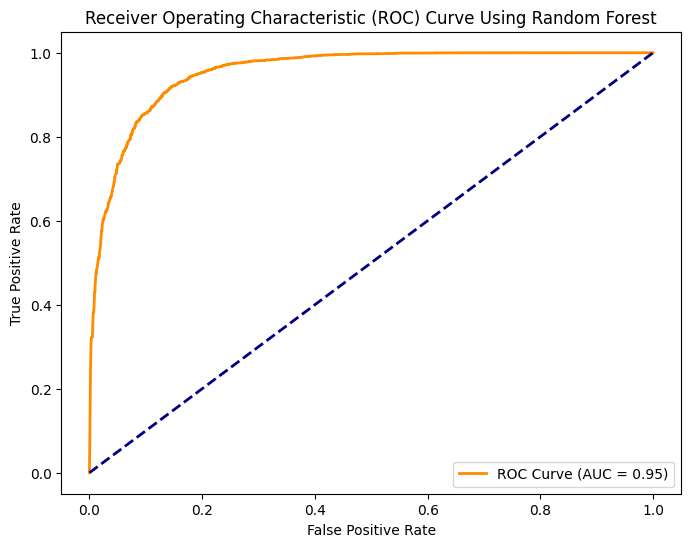

In [ ]:
# AUC
y_pred_proba = rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Using Random Forest')
plt.legend(loc='lower right')
plt.show()

ROC curve menunjukkan performa model Random Forest dengan AUC sebesar 0.95, yang menandakan model memiliki kemampuan klasifikasi yang sangat baik.

In [ ]:
with gzip.open('rfmodel.pkl', 'wb') as f:
    pickle.dump(rf, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(robust, f)
with open('oh_encoder.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(labelenc, f)

Model, scaler dan encoder disimpan dengan menggunakan pickle.

In [ ]:
#Mengambil test case untuk dicek di aplikasi streamlit
test_case_1 = x_test.iloc[0]
actual_1 = y_test.iloc[0]
raw_1 = x_test_raw.iloc[0]
print(raw_1)
input1 = np.array(test_case_1).reshape(1, -1)
pred1 = rf.predict(input1)
print(f"Test Case 1 Prediction: {pred1}")
print(f"Actual Label      : {actual_1}")


no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              1
no_of_week_nights                                 2
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                      0.0
room_type_reserved                      Room_Type 1
lead_time                                       305
arrival_year                                   2018
arrival_month                                    11
arrival_date                                      4
market_segment_type                         Offline
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                             89.0
no_of_special_requests                            0
Name: 32442, dtype: object
Test Case 1 Prediction: [0]
Actual Label      : 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
test_case_2 = x_test.iloc[5]
actual_2 = y_test.iloc[5]
raw_2 = x_test_raw.iloc[5]
print(raw_2)
input2 = np.array(test_case_2).reshape(1, -1)
pred2 = rf.predict(input2)
print(f"Test Case 2 Prediction: {pred2}")
print(f"Actual Label      : {actual_2}")

no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  3
type_of_meal_plan                       Not Selected
required_car_parking_space                       0.0
room_type_reserved                       Room_Type 1
lead_time                                         37
arrival_year                                    2018
arrival_month                                      2
arrival_date                                      15
market_segment_type                           Online
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              67.5
no_of_special_requests                             1
Name: 28224, dtype: object
Test Case 2 Prediction: [1]
Actual Label      : 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
